In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generate dataset

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [3]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_test, y_test = series[7000:, :n_steps], series[7000:, -1]

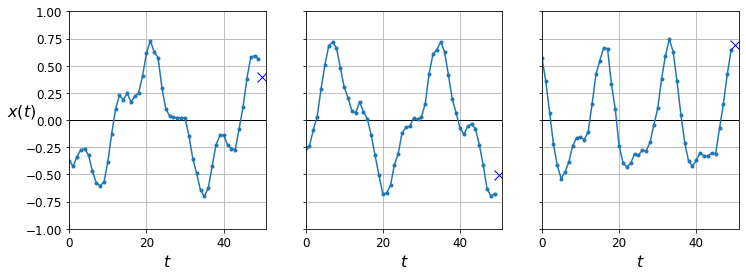

In [4]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_test[col, :, 0], y_test[col, 0], y_label=("$x(t)$" if col==0 else None))
plt.show()

# Fully connected network

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0868
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0058A: 0s - loss: 0.005
Epoch 11/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 12/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 

In [6]:
model.evaluate(X_test, y_test, verbose=0)

0.0040898313745856285

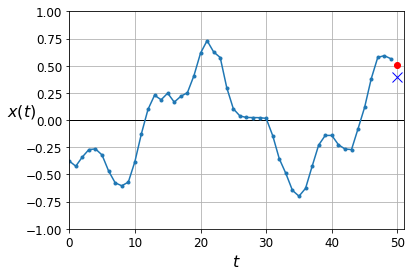

In [7]:
y_pred = model.predict(X_test)
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()

# Simple RNN

In [8]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 3s 12ms/step - loss: 0.1474
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.1457
Epoch 3/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1464
Epoch 4/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0723
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0324
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0237
Epoch 7/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0193
Epoch 8/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0167
Epoch 9/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0149
Epoch 10/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0136
Epoch 11/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0127
Epoch 12/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0121
Epoch 13/20
219/219 [===

In [9]:
model.evaluate(X_test, y_test, verbose=0)

0.010997701436281204

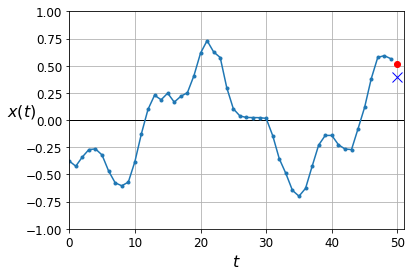

In [10]:
y_pred = model.predict(X_test)
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()

# Deep RNN 1

In [11]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0087
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0036
Epoch 3/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0033
Epoch 4/20
219/219 [==============================] - 12s 55ms/step - loss: 0.0032
Epoch 5/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0031
Epoch 6/20
219/219 [==============================] - 7s 34ms/step - loss: 0.0030
Epoch 7/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0029
Epoch 8/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0029
Epoch 9/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0030
Epoch 10/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0029
Epoch 11/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0028
Epoch 12/20
219/219 [==============================] - 9s 41ms/step - loss: 0.0029
Epoch 13/20

In [12]:
model.evaluate(X_test, y_test, verbose=0)

0.002897640923038125

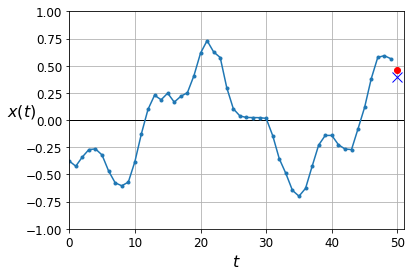

In [13]:
y_pred = model.predict(X_test)
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()

# Deep RNN 2

In [14]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0096
Epoch 2/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0034
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0032
Epoch 4/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0030
Epoch 5/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0030
Epoch 6/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0029
Epoch 7/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0029
Epoch 8/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0028
Epoch 9/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0028
Epoch 10/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0028
Epoch 11/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0027
Epoch 12/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0028
Epoch 13/20
2

In [15]:
model.evaluate(X_test, y_test, verbose=0)

0.002560006221756339

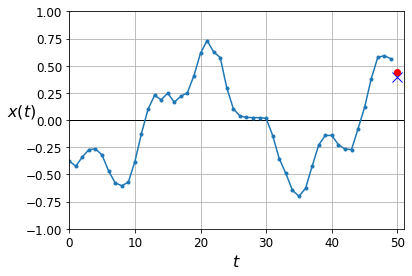

In [16]:
y_pred = model.predict(X_test)
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()

# LSTM

In [17]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0522
Epoch 2/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0215
Epoch 3/20
219/219 [==============================] - 12s 54ms/step - loss: 0.0121
Epoch 4/20
219/219 [==============================] - 14s 63ms/step - loss: 0.0069
Epoch 5/20
219/219 [==============================] - 12s 55ms/step - loss: 0.0040
Epoch 6/20
219/219 [==============================] - 15s 66ms/step - loss: 0.0032
Epoch 7/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0030
Epoch 8/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0029
Epoch 9/20
219/219 [==============================] - 9s 40ms/step - loss: 0.0029
Epoch 10/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0028
Epoch 11/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0028
Epoch 12/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0028
Epoch 13/

In [18]:
model.evaluate(X_test, y_test, verbose=0)

0.002542416797950864

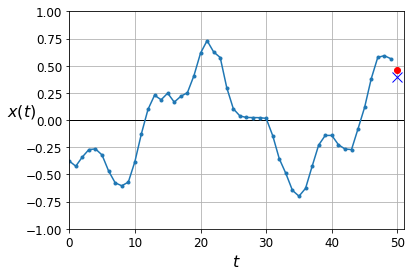

In [19]:
y_pred = model.predict(X_test)
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()

# GRU

In [20]:
model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 9s 40ms/step - loss: 0.0344
Epoch 2/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0063
Epoch 3/20
219/219 [==============================] - 10s 44ms/step - loss: 0.0047
Epoch 4/20
219/219 [==============================] - 9s 41ms/step - loss: 0.0046
Epoch 5/20
219/219 [==============================] - 14s 65ms/step - loss: 0.0043
Epoch 6/20
219/219 [==============================] - 12s 55ms/step - loss: 0.0043
Epoch 7/20
219/219 [==============================] - 13s 61ms/step - loss: 0.0042
Epoch 8/20
219/219 [==============================] - 9s 40ms/step - loss: 0.0041
Epoch 9/20
219/219 [==============================] - 12s 55ms/step - loss: 0.0039
Epoch 10/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0037
Epoch 11/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0037
Epoch 12/20
219/219 [==============================] - 13s 59ms/step - loss: 0.0035
Epoch

In [21]:
model.evaluate(X_test, y_test, verbose=0)

0.0029737716540694237

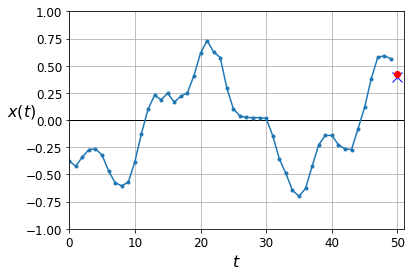

In [22]:
y_pred = model.predict(X_test)
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()